# Data Wrangling 

## Gather

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
from pandas.api.types import CategoricalDtype


In [2]:
#Twitter archive file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Tweet image prediction
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
file_name = url.split('/')[-1]
file_name

'image-predictions.tsv'

In [5]:
if not os.path.isfile(file_name):
    with open(file_name,'wb') as img_file:
        img_file.write(response.content)

In [6]:
#create dataframe from 'image-predictions.tsv'
df_img_predict=pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# Twitter API&JSON
consumer_key = ' '
consumer_secret = ' '
access_token = '-'
access_secret = 'ut01Ok5V011lp45vOe2PzB73m6xk2gewe2yRn86Pkr4IY'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()

In [9]:
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [10]:
#import json file into dictionary and create data frame
import pandas as pd
import json
with open("tweet_json.txt") as fp: 
  dicts = list(map(lambda line: json.loads(line), fp.readlines()))
  
tweet_json = pd.DataFrame(dicts)
df_twitter_json=pd.DataFrame(tweet_json[['id','retweet_count','favorite_count']])

# --------------------------------------------------------------------------------------------------------------

# ----------------------------------------------json file-----------------------------------------------------

In [11]:
#copy the original file (json file ) to another copy file
df_clean_twitter_json = df_twitter_json.copy()

In [12]:
#display info for the twitter_json
df_clean_twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [13]:
#display Describe for the twitter_json
df_clean_twitter_json.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2624.712999,7390.643501
std,6.823170e+16,4440.419445,11479.424820
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,533.000000,1284.000000
50%,7.182469e+17,1225.000000,3208.000000
75%,7.986692e+17,3044.500000,9041.500000
max,8.924206e+17,75427.000000,152426.000000


# ------------------------------------------twitter_archive-------------------------------------------

In [14]:
#copy the original file (twitter_archive) to another copy file
df_clean_twitter_archive = df_twitter_archive.copy()

In [15]:
#display info for the df_clean_twitter_archive
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#display Describe for the df_clean_twitter_archive
df_clean_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# diplay the count for data in source column
df_clean_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
# show how many non data in Epanded_Url
sum(df_clean_twitter_archive.expanded_urls.isnull())

59

In [19]:
#sum for retweet records
sum(df_twitter_archive.text.str.startswith("RT"))

183

# ------------------------------------------Image_file------------------------------------------------

In [20]:
###create copy from image-predictions table
df_clean_image_predictions = df_img_predict.copy()

In [21]:
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_clean_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_clean_image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                       

In [24]:
sum(df_clean_image_predictions.jpg_url.isnull())

0

# --------------------------------------------Assess--------------------------------------------------------

# Quality

###twitter_archive table
    1- Completeness--Epanded_Url column has a NAN value.
    2-Erroneous datatypes (timestamp and retweeted_status_timestamp columns).
    3-doggo,floofer,pupper,puppo is status for dog .. we cant put this information in one column called classification
    Looking into the pets’ classification of: doggo, floofer, pupper, puppo; Are all or most of dogs classified?, Is the
    classification correct and mutually exclusive?
    4- coulum name has invalid data and the data not lowercase
    5- source column contain html url tag
    6- we dont need the retweet data 
    
###image-predictions table
    1-p1_conf ,P2_conf ,P3_conf column contain unclear data
    2- there is '_' in colum data P1
    
    
# tidy 

###twitter_archive table
    1- name column that not clear name
    2-doggo,floofer,pupper,puppo is classification for dogs.
    
###image-predictions table
    1-p1,p2,p3 unclear colums name
    
###API-Twitter table
    1- we need only 3 columns (id . retweet_count , favorite_count)
    2- the id column name is not clear
    
    
#### General
###twitter_archive_master
    1-merge All datasets into one dataset (twitter_archive_master)
    2-retweet_count,favorite_accont is float type


# --------------------Clean---------------------------------------------------------

# Define 
 1-fill the null value for Epanded_Url

In [25]:
#code
df_clean_twitter_archive.expanded_urls.fillna('https://twitter.com/dog_rates/status/{}'.format(df_clean_twitter_archive["tweet_id"])
                                              ,inplace = True)

In [26]:
#test
sum (df_clean_twitter_archive.expanded_urls.isnull())

0

# Define 
  2- Relace the values from Source column to real data

In [27]:
#Code
C1 = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
C2 = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
C3 = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
C4 = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
df_clean_twitter_archive.source = df_clean_twitter_archive.source.replace(C1, 'Twitter for iPhone')
df_clean_twitter_archive.source = df_clean_twitter_archive.source.replace(C2, 'Vine - Make a Scene')
df_clean_twitter_archive.source = df_clean_twitter_archive.source.replace(C3, 'Twitter Web Client')
df_clean_twitter_archive.source = df_clean_twitter_archive.source.replace(C4, 'TweetDeck')

In [28]:
#test the extracted source column
df_clean_twitter_archive.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

# Define
3-change to percentage format in p1_conf,p2_conf,p3_conf

In [29]:
df_clean_image_predictions['p1_conf'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_clean_image_predictions['p1_conf']], index = df_clean_image_predictions.index)
df_clean_image_predictions['p2_conf'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_clean_image_predictions['p2_conf']], index = df_clean_image_predictions.index)
df_clean_image_predictions['p3_conf'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_clean_image_predictions['p3_conf']], index = df_clean_image_predictions.index)

In [30]:
#test the data for in p1_conf,p2_conf,p3_conf
df_clean_image_predictions[['p1_conf','p2_conf','p3_conf']]


,p1_conf,p2_conf,p3_conf
0,46.51%,15.67%,6.14%
1,50.68%,7.42%,7.20%
2,59.65%,13.86%,11.62%
3,40.81%,36.07%,22.28%
4,56.03%,24.37%,15.46%
5,65.11%,26.38%,1.62%
6,93.30%,4.59%,1.79%
7,69.25%,5.83%,5.44%
8,96.25%,1.46%,0.80%
9,20.15%,19.23%,8.21%


# Define
 4-Make the data in this columns(Dog_Type1,Dog_Type2,Dog_Type3) to lower case

In [31]:
#code
df_clean_image_predictions.p1 = df_clean_image_predictions.p1.str.lower()
df_clean_image_predictions.p2 = df_clean_image_predictions.p2.str.lower()
df_clean_image_predictions.p3 = df_clean_image_predictions.p3.str.lower()

In [32]:
#test data in this columns(Dog_Type1,Dog_Type2,Dog_Type3)
df_clean_image_predictions[['p1','p2','p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


# Define 
5-replace under_scores in p1,p2,p3 with white spaces

In [33]:
#Code
df_clean_image_predictions.p1 = df_clean_image_predictions.p1.str.replace("_"," ")
df_clean_image_predictions.p2 = df_clean_image_predictions.p2.str.replace("_"," ")
df_clean_image_predictions.p3 = df_clean_image_predictions.p3.str.replace("_"," ")


In [34]:
#test the data in p1,p2,p3
df_clean_image_predictions[['p1','p2','p3']]


,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman
5,bernese mountain dog,english springer,greater swiss mountain dog
6,box turtle,mud turtle,terrapin
7,chow,tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


# Define
6-drop retweet rows which are begining with "RT"

In [35]:
#code --drop retweet rows which are begining with "RT"
retweets = df_clean_twitter_archive.text.str.startswith("RT")
df_clean_twitter_archive = df_clean_twitter_archive[~retweets]

In [36]:
#test--drop retweet rows which are begining with "RT"
sum(df_clean_twitter_archive.text.str.startswith("RT"))

0

# Define 
7-convert datatypes for columns(timestamp and retweeted_status_timestamp) to type timestamp.

In [37]:
# convert the timestamp and retweeted_status_timestamp columns type from object to timestamp
df_clean_twitter_archive["timestamp"] = pd.to_datetime(df_clean_twitter_archive["timestamp"])
df_clean_twitter_archive["retweeted_status_timestamp"] = pd.to_datetime(df_clean_twitter_archive["retweeted_status_timestamp"])

In [38]:
#test
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2173 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
dtypes: datetime64[ns]

# Define
8- rename the name column to dog_name in df_clean_twitter_archive

In [39]:
#Rename the name column to Dog_name
df_clean_twitter_archive = df_clean_twitter_archive.rename({'name': 'Dog_Name'}, axis=1) 

In [40]:
#test 
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2173 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
Dog_Name                      2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
dtypes: datetime64[ns]

# Define
9- make the Dog_name data to lowercase

In [41]:
#code for convert to lowercase
df_clean_twitter_archive.Dog_Name = df_clean_twitter_archive.Dog_Name.str.lower()

In [42]:
#test
df_clean_twitter_archive.Dog_Name

0        phineas
1          tilly
2         archie
3          darla
4       franklin
5           none
6            jax
7           none
8           zoey
9         cassie
10          koda
11         bruno
12          none
13           ted
14        stuart
15        oliver
16           jim
17          zeke
18       ralphus
20        gerald
21       jeffrey
22          such
23        canela
24          none
25          none
26          maya
27        mingus
28         derek
29        roscoe
30          none
          ...   
2326       quite
2327           a
2328        none
2329        none
2330        none
2331        none
2332        none
2333          an
2334           a
2335          an
2336        none
2337        none
2338        none
2339        none
2340        none
2341        none
2342        none
2343        none
2344        none
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        none
2352           a
2353          

# --------------------------------tidy------------------------------------------------------------------

# Define 
 1-create new column for classification

In [43]:
#code 
df_clean_twitter_archive['Dog_class'] = ' '


In [44]:
#test for creating the Dog_class colum
df_clean_twitter_archive.Dog_class

0        
1        
2        
3        
4        
5        
6        
7        
8        
9        
10       
11       
12       
13       
14       
15       
16       
17       
18       
20       
21       
22       
23       
24       
25       
26       
27       
28       
29       
30       
       ..
2326     
2327     
2328     
2329     
2330     
2331     
2332     
2333     
2334     
2335     
2336     
2337     
2338     
2339     
2340     
2341     
2342     
2343     
2344     
2345     
2346     
2347     
2348     
2349     
2350     
2351     
2352     
2353     
2354     
2355     
Name: Dog_class, Length: 2173, dtype: object

# Define
2-combine the data from doggo,puppo,floofer,pupper  columns into Dog_Class columns

In [45]:
# code for merge data from doggo,puppo,floofer,pupper  columns into Dog_Class columns
df_clean_twitter_archive.loc[df_clean_twitter_archive['doggo'] == 'doggo', 'Dog_class'] = 'doggo'
df_clean_twitter_archive.loc[df_clean_twitter_archive['puppo'] == 'puppo', 'Dog_class'] = 'puppo'
df_clean_twitter_archive.loc[df_clean_twitter_archive['floofer'] == 'floofer', 'Dog_class'] = 'floofer'
df_clean_twitter_archive.loc[df_clean_twitter_archive['pupper'] == 'pupper', 'Dog_class'] = 'pupper'

In [46]:
#test the all data from doggo,puppo,floofer,pupper into Dog_Class
df_clean_twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2173 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
Dog_Name                      2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
Dog_class             

# Define 
3-Drop column doggo,puppo,floofer,pupper

In [47]:
#Code for Drop column doggo,puppo,floofer,pupper
df_clean_twitter_archive.drop(df_clean_twitter_archive.columns[[13,14,15,16]],axis=1 , inplace=True) 

In [48]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2173 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
Dog_Name                      2173 non-null object
Dog_class                     2173 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 254.6+ KB


# Define 
Rename the name column to p1 to Dog_type1  ,p2 to Dog_type2 ,p3 to Dog_type3

In [49]:
#Code for Rename the name column to p1 to Dog_type1  ,p2 to Dog_type2 ,p3 to Dog_type3
df_clean_image_predictions = df_clean_image_predictions.rename({'p1': 'Dog_Type1', 'p2': 'Dog_Type2', 'p3': 'Dog_Type3'}, axis=1) 

In [50]:
#test Rename the name column to p1 to Dog_type1  ,p2 to Dog_type2 ,p3 to Dog_type3
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
Dog_Type1    2075 non-null object
p1_conf      2075 non-null object
p1_dog       2075 non-null bool
Dog_Type2    2075 non-null object
p2_conf      2075 non-null object
p2_dog       2075 non-null bool
Dog_Type3    2075 non-null object
p3_conf      2075 non-null object
p3_dog       2075 non-null bool
dtypes: bool(3), int64(2), object(7)
memory usage: 152.1+ KB


# Define
#Rename id to tweet_id in json file dataframe

In [51]:
#Rename id to tweet_id
df_clean_twitter_json.rename(columns=lambda x: x.replace('id', 'tweet_id'), inplace=True)

In [52]:
#test for rename the column name id
df_clean_twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


# define
covert data type from float to int in columns(retweet_count	favorite_count) in twitter_archive_master dataset 

In [53]:
#Code --- covert data type from float to int in columns(retweet_count	favorite_count) in twitter_archive_master dataset 
df_clean_twitter_json.retweet_count = df_clean_twitter_json.retweet_count.astype('Int64')
df_clean_twitter_json.favorite_count = df_clean_twitter_json.favorite_count.astype('Int64')


In [54]:
#test for changing data type for (retweet_count	favorite_count)
df_clean_twitter_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


# Define
#merge 3 dataframs into one frame named twitter_archive_master

In [55]:
#merge dataframs
df_clean_f1 = pd.merge(df_clean_twitter_archive, df_clean_image_predictions, how='left', on=['tweet_id'])
twitter_archive_master = pd.merge(df_clean_f1, df_clean_twitter_json, how='left', on=['tweet_id'])

In [56]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,Dog_Type2,p2_conf,p2_dog,Dog_Type3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,9.70%,False,bagel,8.59%,False,banana,7.61%,False,7468.0,35375.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,32.36%,True,pekinese,9.06%,True,papillon,6.90%,True,5545.0,30612.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,71.60%,True,malamute,7.83%,True,kelpie,3.14%,True,3671.0,23031.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,17.03%,False,labrador retriever,16.81%,True,spatula,4.08%,False,7643.0,38666.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,55.57%,True,english springer,22.58%,True,german short-haired pointer,17.52%,True,8242.0,36946.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,42.56%,True,irish terrier,11.63%,True,indian elephant,7.69%,False,2758.0,18625.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,34.17%,True,border collie,19.93%,True,ice lolly,19.35%,False,1790.0,10818.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,56.61%,True,eskimo dog,17.84%,True,pembroke,7.65%,True,16705.0,59603.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,48.76%,True,irish setter,19.31%,True,chesapeake bay retriever,11.82%,True,3813.0,25626.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,51.13%,True,cardigan,45.10%,True,chihuahua,2.92%,True,6480.0,29249.0


# Define
drop the records that not contain the image for dogs

In [57]:
#code drop the null values for jpg_url column
twitter_archive_master = twitter_archive_master.dropna(subset=['jpg_url'])

In [58]:
#test for how many records that not contain image urls
sum(twitter_archive_master.jpg_url.isnull())

0

# define 
#delete the columns that not important 

In [ ]:
#drop un-needed columns
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp', 'retweeted_status_id','retweeted_status_user_id'], axis = 1)

In [64]:
#test the changes 
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2172
Data columns (total 22 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
Dog_Name              1993 non-null object
Dog_class             1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null float64
Dog_Type1             1993 non-null object
p1_conf               1993 non-null object
p1_dog                1993 non-null object
Dog_Type2             1993 non-null object
p2_conf               1993 non-null object
p2_dog                1993 non-null object
Dog_Type3             1993 non-null object
p3_conf               1993 non-null object
p3_dog                1993 non-null object
retweet_count         1986 

In [65]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

# ---------------------------visualization-------------------------------------

# Research Question 1: Which type of dogs got the highest retweet counts and favorite counts?

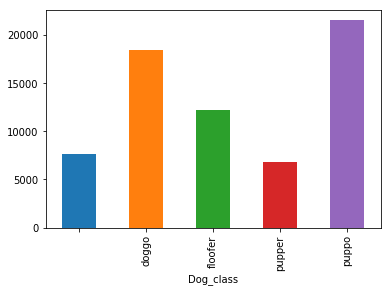

In [66]:
twitter_archive_master.groupby('Dog_class')['favorite_count'].mean().plot(kind = 'bar')

# Research Question 1: Which type of dogs got the highest rating_numerator?

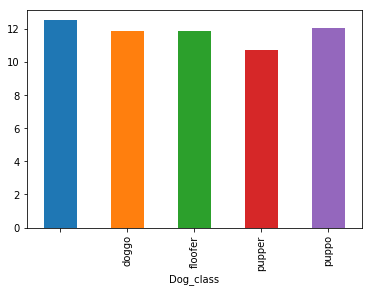

In [67]:
twitter_archive_master.groupby(['Dog_class'])['rating_numerator'].mean().plot(kind = "bar")

# which dog type predictions has highst value

Text(0,0.5,'Count %')

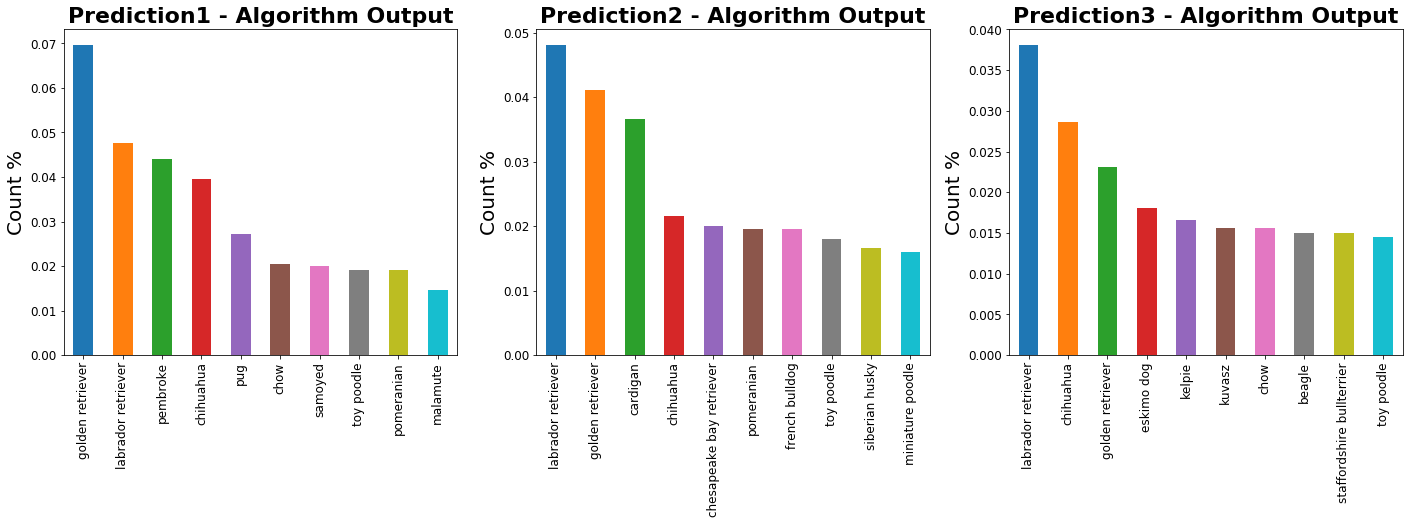

In [68]:
plt.figure(1)
plt.subplot(131)

twitter_archive_master['Dog_Type1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 12.0)
plt.title('Prediction1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
twitter_archive_master['Dog_Type2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 12.0)
plt.title('Prediction2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
twitter_archive_master['Dog_Type3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 12.0)
plt.title('Prediction3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

# The highst predictions from the three algorthims indicates to golden retriever and labrador retriever

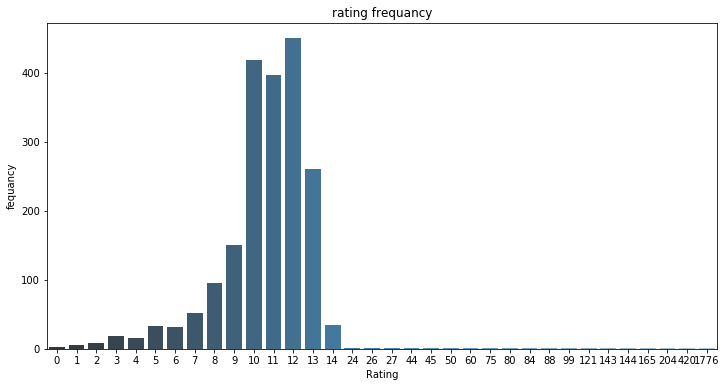

In [69]:
data = twitter_archive_master.rating_numerator.value_counts()   
x = data.index
y = data.values
fig , ax = plt.subplots(figsize = (12,6))
g=sns.barplot(x,y,palette="Blues_d")
ax.set(xlabel = 'Rating' ,ylabel = 'fequancy',title = 'rating frequancy')
plt.show()


# lets look for the rating distribution 

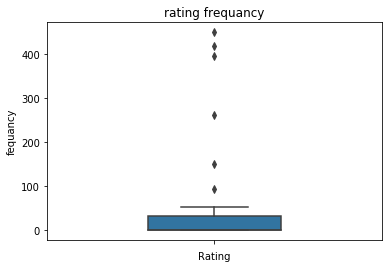

In [70]:
data = twitter_archive_master.rating_numerator.value_counts()   
ax = sns.boxplot(data, orient='v', width = .4)
ax.set(xlabel = 'Rating' ,ylabel = 'fequancy',title = 'rating frequancy')
plt.show()


# we can see the outliers

In [108]:
outliers = twitter_archive_master[twitter_archive_master.rating_numerator > 100][['rating_numerator','Dog_Name','jpg_url','text']]

In [109]:
# see the outliers values and check it
outliers

,rating_numerator,Dog_Name,jpg_url,text
733,165,none,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Why does this never happen at my front door......
942,204,this,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,Say hello to this unbelievably well behaved sq...
1454,143,none,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,"Two sneaky puppers were not initially seen, mo..."
1455,121,none,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,Someone help the girl is being mugged. Several...
1599,144,none,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,IT'S PUPPERGEDDON. Total of 144/120 ...I think...


# rating_numerator = 420 that isn't for image dog .. so t will remove it

In [107]:
#delete the the row that contain image not for dog rating_numerator = 420 and rating_numerator = 1776 is deleted tweet

twitter_archive_master.drop(twitter_archive_master.loc[twitter_archive_master['rating_numerator']== 420].index, inplace=True)
twitter_archive_master.drop(twitter_archive_master.loc[twitter_archive_master['rating_numerator']== 1776].index, inplace=True)

In [74]:
#comparing tweets different source
data = twitter_archive_master.groupby('source').count()['tweet_id']

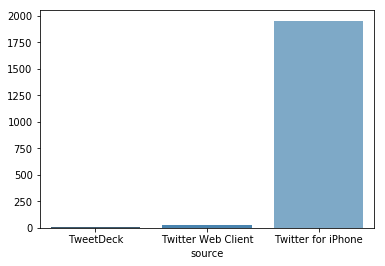

In [75]:
x = data.index
y = data.values
g=sns.barplot(x,y,palette="Blues_d")
ax.set(xlabel = 'count' ,ylabel = 'tweet source',title = 'tweet source counts')
plt.show()

# the most source is twitter for iphone

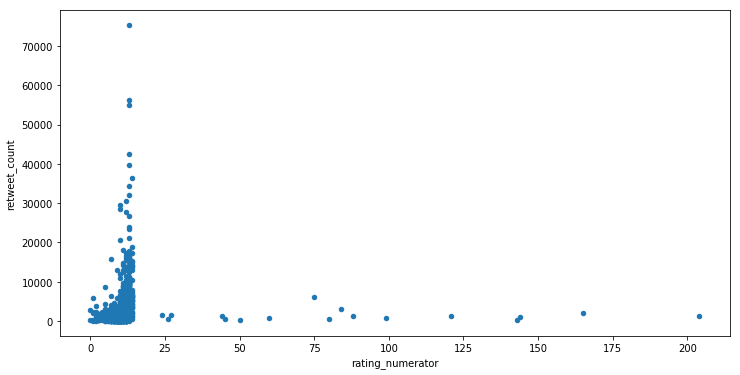

In [113]:
#Let's look at the relationship between 'rating_numerator' and 'retweet_count'
fig , ax = plt.subplots(figsize = (12,6))
twitter_archive_master.plot(x='rating_numerator',y='retweet_count',kind='scatter', ax=ax);



In [ ]:
#They are relative,too, and I also found that rating_numerator 13 got the highest favorite counts and retweet counts.